### 0. Setup

Import the libraries we need.

In [1]:
! pip install ISLP
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.compat import lzip
import seaborn as sns
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

### 1. Import data

Load the data, and explore the relationship among all the attributes.


### Overview
The **Boston Housing Dataset** contains information on **506 housing units** in the suburbs of Boston, with **13 features** used to predict the median value of homes in different neighborhoods. Each sample in the dataset represents the statistical information of a particular area.

### Features
The dataset typically includes the following variables:

1. **CRIM**: Per capita crime rate by town
2. **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft.
3. **INDUS**: Proportion of non-retail business acres per town
4. **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. **NOX**: Nitric oxides concentration (parts per 10 million)
6. **RM**: Average number of rooms per dwelling
7. **AGE**: Proportion of owner-occupied units built prior to 1940
8. **DIS**: Weighted distances to five Boston employment centers
9. **RAD**: Index of accessibility to radial highways
10. **TAX**: Full-value property tax rate per \$10,000
11. **PTRATIO**: Pupil-teacher ratio by town
12. **B**: Calculation \( B = 1000(Bk - 0.63)^2 \) where Bk is the proportion of Black residents
13. **LSTAT**: Percentage of the population considered lower status
14. **MEDV**: Median value of owner-occupied homes (in \$1000s)



In [7]:
Boston = pd.read_csv('./data/HousingData.csv')
Boston.columns,Boston.shape,type(Boston),Boston.head(10)

(Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT', 'MEDV'],
       dtype='object'),
 (506, 14),
 pandas.core.frame.DataFrame,
       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
 0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900    1  296     15.3   
 1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671    2  242     17.8   
 2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671    2  242     17.8   
 3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622    3  222     18.7   
 4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622    3  222     18.7   
 5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622    3  222     18.7   
 6  0.08829  12.5   7.87   NaN  0.524  6.012   66.6  5.5605    5  311     15.2   
 7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505    5  311     15.2   
 8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821    5  311     

In [8]:
Boston.isna().any()

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX        False
RM         False
AGE         True
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT       True
MEDV       False
dtype: bool

In [12]:
print(Boston.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [13]:
Boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX']]

,CRIM,ZN,INDUS,CHAS,NOX
0,0.00632,18.0,2.31,0.0,0.538
1,0.02731,0.0,7.07,0.0,0.469
2,0.02729,0.0,7.07,0.0,0.469
3,0.03237,0.0,2.18,0.0,0.458
4,0.06905,0.0,2.18,0.0,0.458
...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573
502,0.04527,0.0,11.93,0.0,0.573
503,0.06076,0.0,11.93,0.0,0.573
504,0.10959,0.0,11.93,0.0,0.573


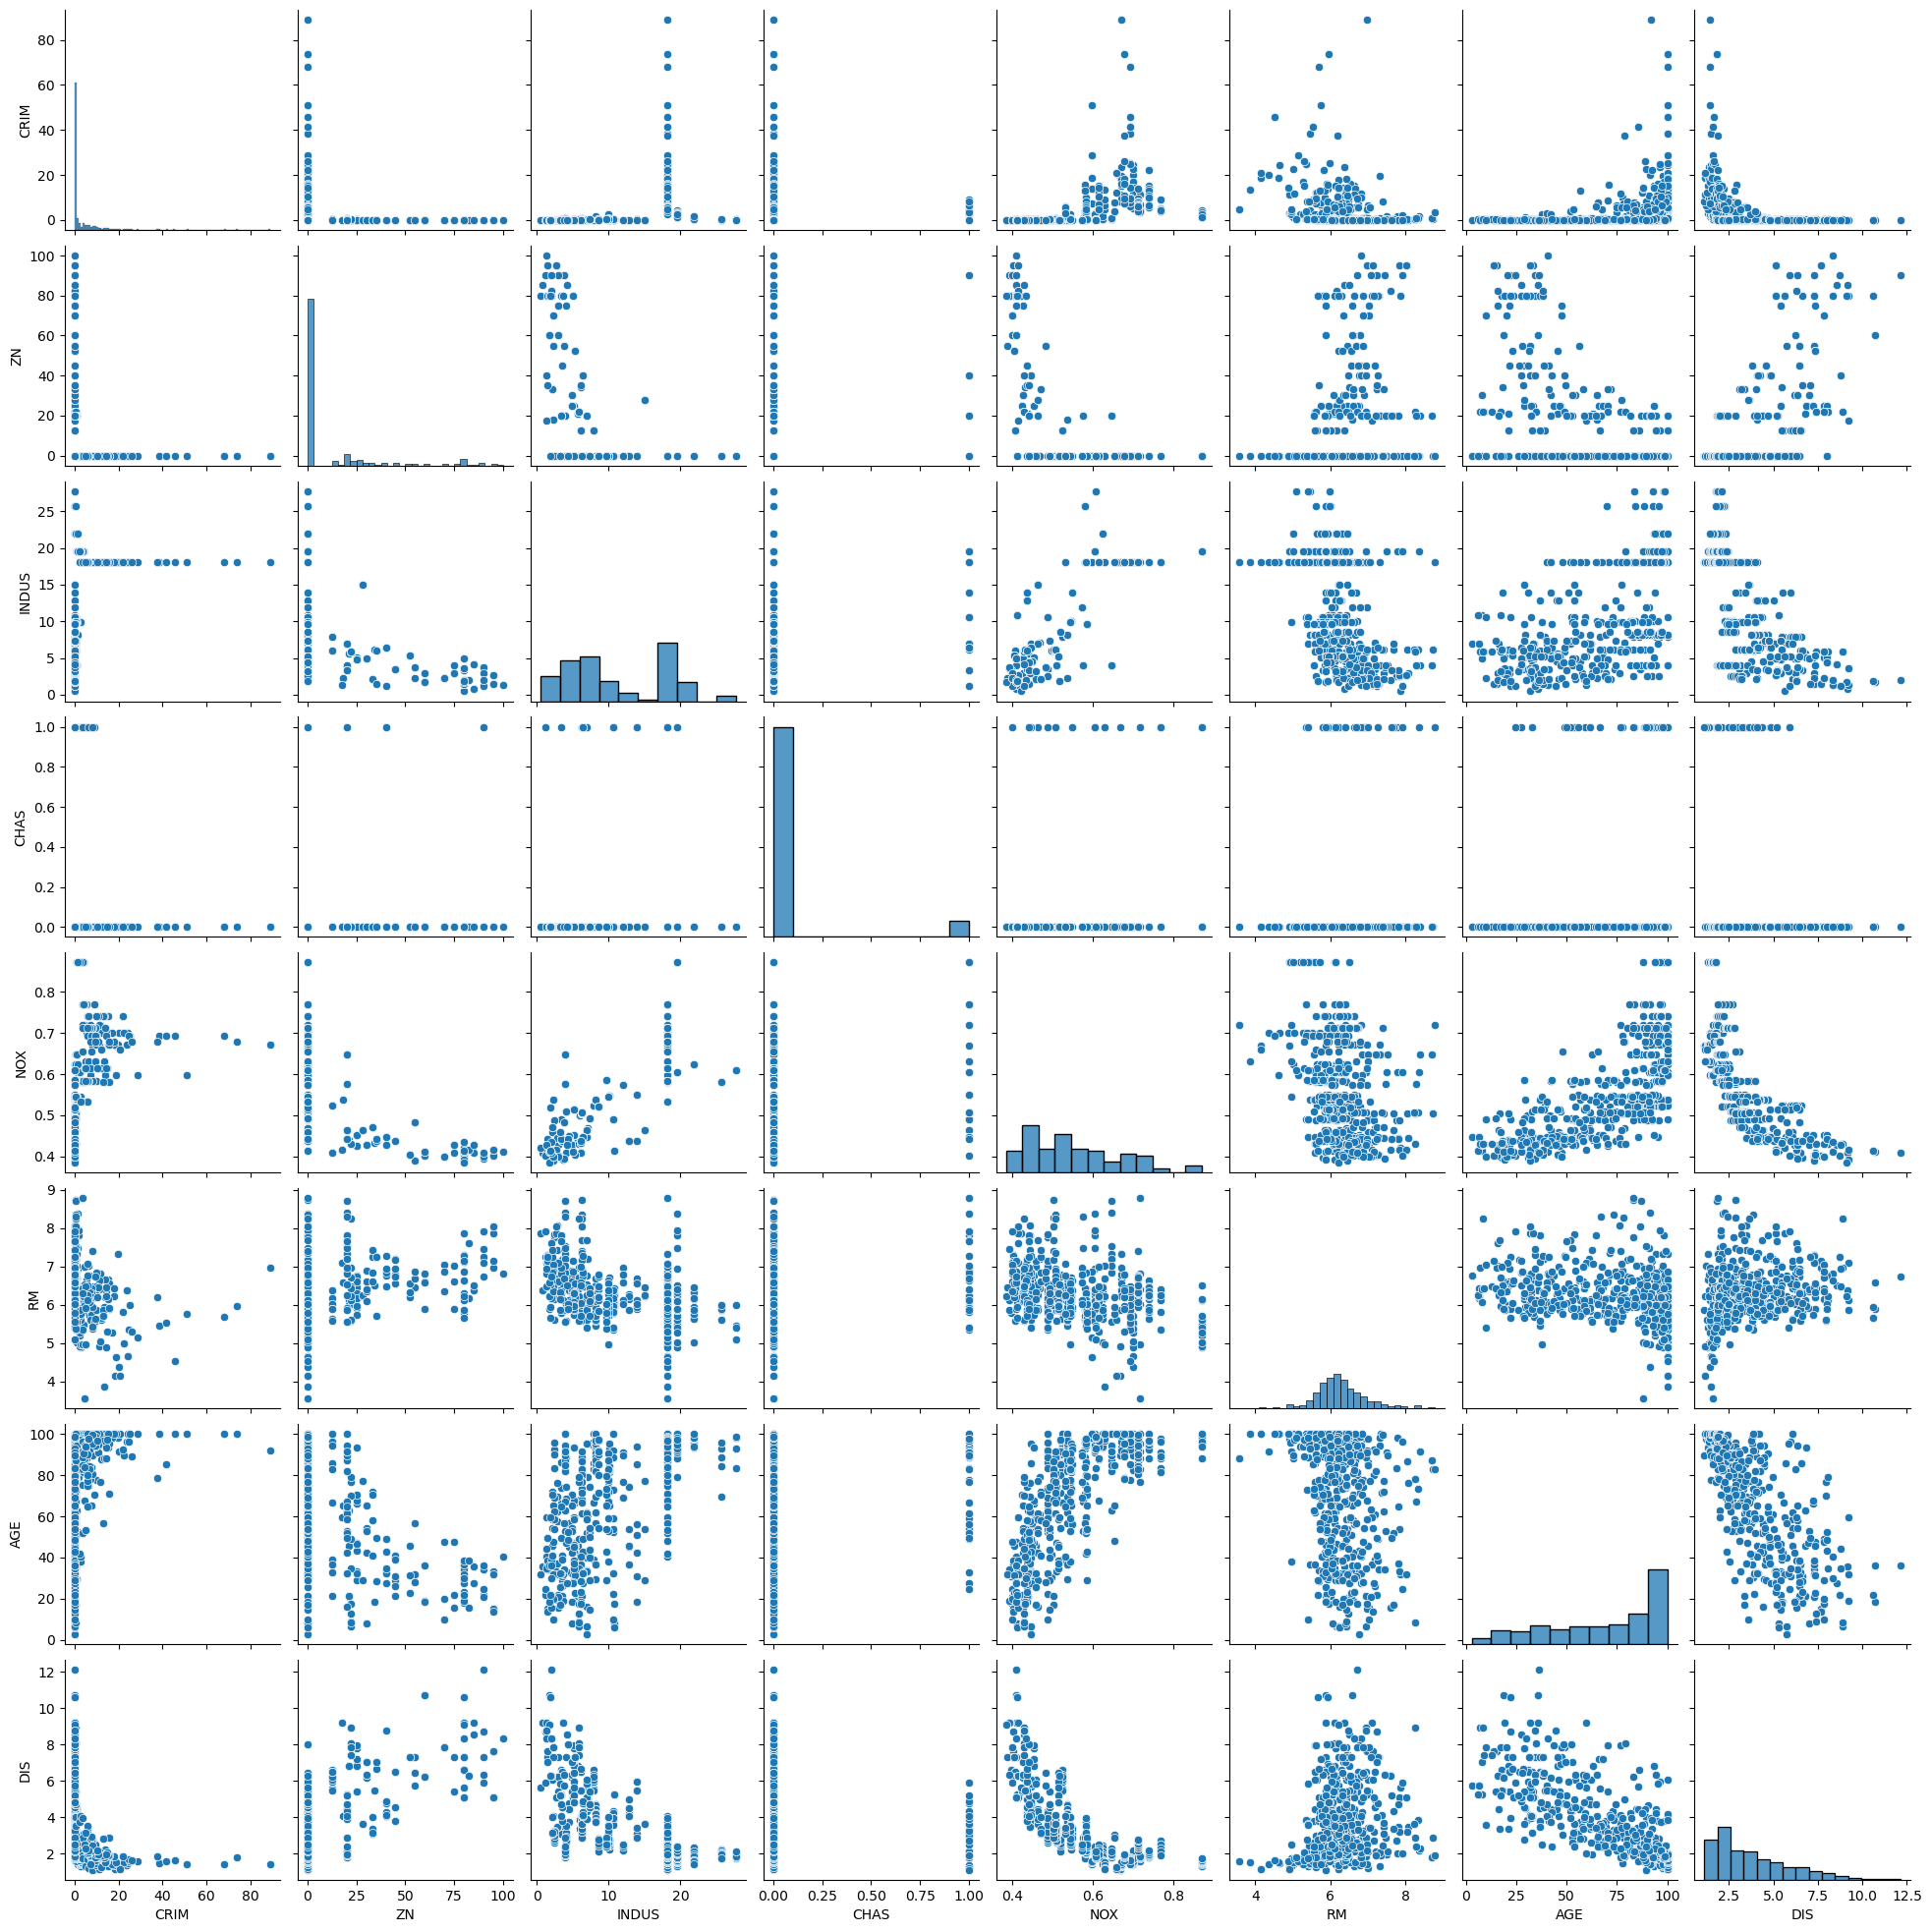

In [16]:
sns.pairplot(Boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS']])
# sns.pairplot() 会绘制一个矩阵式的图表，其中每一对特征都会在矩阵的一个格子里被绘制成一个散点图。此外，在对角线上，会显示各个特征的分布情况，通常是直方图或核密度估计图（KDE）。

### 2. Modeling (Autocorrelation and Normality)

In [27]:
from sklearn import impute
terms0 = Boston.columns.drop(['INDUS', 'AGE', 'MEDV'])
X0 = MS(terms0).fit_transform(Boston)
imputer = impute.SimpleImputer(strategy='mean')
X0_cleaned = imputer.fit_transform(X0)
y0 = Boston['MEDV']
model0 = sm.OLS(y0, X0_cleaned)
results0 = model0.fit()
results0.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     121.9
Date:                Thu, 10 Oct 2024   Prob (F-statistic):          4.81e-133
Time:                        12:35:44   Log-Likelihood:                -1508.2
No. Observations:                 506   AIC:                             3040.
Df Residuals:                     494   BIC:                             3091.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.3481      5.152      6.667      0.000      24.225      44.471
x1            -0.1106      0.033     -3.358      0.001      -0.175      -0.046
x2             0.0425      0.014      3.113      0.002       0.016       0.069
x3             2.9570      0.880      3.359      0.001       1.227       4.687
x4           -18.0829      3.587     -5.041      0.000     -25.131     -11.035
x5             4.0807      0.408      9.996      0.000       3.279       4.883
x6            -1.4164      0.185     -7.663      0.000      -1.780      -1.053
x7             0.2840      0.065      4.402      0.000       0.157       0.411
x8            -0.0117      0.003     -3.420      0.001      -0.018      -0.005
x9            -0.9472      0.132     -7.167      0.000      -1.207      -0.688
x10            0.0093      0.003      3.397      0.001       0.004       0.015
x11           -0.4783      0.048    -10.035      0.000      -0.572      -0.385
==============================================================================
Omnibus:                      185.060   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              866.153
Skew:                           1.564   Prob(JB):                    8.26e-189
Kurtosis:                       8.594   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Condition Number for Detecting Collinearity

The condition number is commonly used to detect collinearity in regression analysis or other linear algebra applications. Collinearity refers to the situation where two or more independent variables in a model are highly correlated, which can lead to instability and inaccurate coefficient estimates. Here’s how the condition number is used to assess collinearity:

### Condition Number and Collinearity
In multiple linear regression, the condition number $\kappa(X) $ of the design matrix $X $ can be used to assess collinearity. The condition number is calculated as:

$$
\kappa(X) = \frac{\sigma_{\text{max}}}{\sigma_{\text{min}}}
$$
where:
- $\sigma_{\text{max}} $ is the largest singular value of matrix $X $
- $\sigma_{\text{min}} $ is the smallest singular value of matrix $X $

### Collinearity Assessment Criteria
The condition number helps in identifying the degree of collinearity based on the following thresholds:

- **1 ≤ $\kappa(X) $ < 10**: Little to no collinearity, and the model is usually stable.
- **10 ≤ $\kappa(X)$ < 30**: Moderate collinearity is present, which may affect the model estimation to some extent.
- **$\kappa(X) \geq 30$**: Severe collinearity is present, indicating that the model estimates are likely very unstable, and coefficient estimates may be unreliable.

### Key Points
- **High Condition Number Indicates Collinearity**: A large condition number suggests that the columns of matrix $X $ are highly correlated, leading to collinearity. This makes it difficult for the model to accurately estimate the coefficients due to overlapping information among the variables.
- **Standardizing Data**: It is common to standardize data before calculating the condition number to eliminate the influence of different scales or units on the results.

By evaluating the condition number, you can effectively detect multicollinearity issues in a model and take appropriate actions, such as removing correlated variables or applying techniques like principal component regression, to address the impact of collinearity.



### Interaction Terms

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
terms0 = Boston.columns.drop(['indus', 'age', 'medv'])
y = Boston['medv']
X = poly.fit_transform(Boston)
Xb = sm.add_constant(X)
mod = sm.OLS(y, Xb)
res = mod.fit()
res.summary()

### 3. High-leverage points

### 1. Code Explanation
https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.influence_plot.html

external:bool

Whether to use externally or internally studentized residuals. It is recommended to leave external as True (default).

external residual represents the deleted residual.

### 2. What the Plot Represents
- Row labels for the observations in which the leverage, measured by the diagonal of the hat matrix, is high or the residuals are large, as the combination of large residuals and a high influence value indicates an influence point. The value of large residuals can be controlled using the alpha parameter. Large leverage points are identified as hat_i > 2 * (df_model + 1)/nobs.


- Cook's Distance measures the influence of each data point on the overall fit of the model; a larger value indicates that the data point has a more substantial impact on the model’s estimates.

- While leverage (the X-axis) indicates how much a data point differs in the independent variable space (i.e., how far it is from other points), the size of the points is determined by Cook's Distance, which takes into account both leverage and the residuals.



In [ ]:
fig = sm.graphics.influence_plot(results0,criterion='cooks',)
fig.tight_layout(pad=1.0)

In [ ]:
df = Boston[terms0.append(pd.Index(["medv"]))]
print("the scale of raw data:", df.shape)
# obtain Cook's distance
lm_cooksd = results0.get_influence().cooks_distance[0]

# get length of df to obtain n
n = len(Boston["medv"])

# calculate critical d
critical_d = 4/n
print('Critical Cooks distance:', critical_d)

# identification of potential outliers with leverage
out_d = lm_cooksd > critical_d

# output potential outliers with leverage
print(df.index[out_d], "\n",
    lm_cooksd[out_d])
print("lenth:", len(lm_cooksd[out_d]))
subset = ~df.index.isin(df.index[out_d].tolist())
Boston = Boston.iloc[subset] #remove outliers and fit again

In [ ]:
terms0 = Boston.columns.drop(['indus', 'age', 'medv'])
X0 = MS(terms0).fit_transform(Boston)
y0 = Boston['medv']
model0 = sm.OLS(y0, X0)
results0 = model0.fit()
results0.summary()

### 4. Heteroscedasticity

In [ ]:
# fitted values
model_fitted_y = results0.fittedvalues
df = Boston[terms0.append(pd.Index(["medv"]))]
#  Plot
plot = sns.residplot(x=model_fitted_y, y='medv', data=df, lowess=True,
                     scatter_kws={'alpha': 0.5},
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

### Test for Heteroscedasticity

The Breusch-Pagan test is used to detect heteroscedasticity in a regression model.


- Lagrange multiplier statistic: A statistic used to test for heteroscedasticity.
- p-value: The p-value associated with the Lagrange multiplier statistic, indicating the significance level.
- f-value: The F-test statistic, another method of testing for heteroscedasticity.
- f p-value: The p-value corresponding to the F-test statistic.

In [ ]:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sm.stats.het_breuschpagan(results0.resid, results0.model.exog)
lzip(name, test)

### 5. Collinearity



In [ ]:
# Inspect correlation
# Calculate correlation using the default method ( "pearson")
df = Boston[terms0]
corr = df.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  square=True, annot_kws={"size": 12});

In [ ]:
terms0 = Boston.columns.drop(['indus', 'age', 'medv', 'rad']) #drop rad because of high correlation
X0 = MS(terms0).fit_transform(Boston)
y0 = Boston['medv']
model0 = sm.OLS(y0, X0)
results0 = model0.fit()
results0.summary() #Conditional Number decrease

 ### 6. Only focus on the independent variables which have linear relationship with dependent variable

In [ ]:
terms0 = Boston.columns.drop(['zn','crim','nox', 'indus', 'chas', 'age', 'rad', 'tax',
       'ptratio','medv'])
X0 = MS(terms0).fit_transform(Boston)
y0 = Boston['medv']
model0 = sm.OLS(y0, X0)
results0 = model0.fit()
results0.summary() #Conditional number pretty small

In [ ]:
df = Boston[terms0.append(pd.Index(["medv"]))]
print("the scale of raw data:", df.shape)
# obtain Cook's distance
lm_cooksd = results0.get_influence().cooks_distance[0]

# get length of df to obtain n
n = len(Boston["medv"])

# calculate critical d
critical_d = 4/n
print('Critical Cooks distance:', critical_d)

# identification of potential outliers with leverage
out_d = lm_cooksd > critical_d

# output potential outliers with leverage
print(df.index[out_d], "\n",
    lm_cooksd[out_d])
print("lenth:", len(lm_cooksd[out_d]))
subset = ~df.index.isin(df.index[out_d].tolist())
Boston = Boston.iloc[subset]
terms0 = Boston.columns.drop(['zn','crim','nox', 'indus', 'chas', 'age', 'rad', 'tax',
       'ptratio','medv'])
X0 = MS(terms0).fit_transform(Boston)
y0 = Boston['medv']
model0 = sm.OLS(y0, X0)
results0 = model0.fit()
results0.summary()

In [ ]:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sm.stats.het_breuschpagan(results0.resid, results0.model.exog)
lzip(name, test)

In [ ]:
sns.pairplot(Boston)